In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os, sys
import numpy as np
from pathlib import Path
import pickle
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

cwd = os.getcwd()
dirLib = cwd + r'/library'
if dirLib not in sys.path:
    sys.path.append(dirLib)

from load_ARSENL_data import load_INPHAMIS_data, set_binwidth

mpl.rcParams.update({"figure.facecolor": "white"})

In [36]:
home = str(Path.home())

load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'

# # Sims results for paper
# fname_dead_fit = r'\eval_loss_dtimeTrue_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv'
# fname_pois_fit = r'\eval_loss_dtimeFalse_Rho1.0E+06-1.0E+10_order5-21_shots1.00E+05_best_fit.csv'
# Experiment results for paper
fname_dead_fit = r'\eval_loss_dtimeTrue_OD1.7E+00-3.4E+00_order7-19_shots1.00E+05_use_final_True_best_fit.csv'
fname_pois_fit = r'\eval_loss_dtimeFalse_OD1.7E+00-3.4E+00_order7-19_shots1.00E+05_use_final_True_best_fit.csv'

# # Sims fname_ttag
# fname_ttag = r'\fit_figures\eval_loss_dtimeTrue_Rho1000000.0-10000000000.0_order5-21_ref_shots1.00E+07_lsr_shots1.00E+05_use_final_True_best_fit.pkl'
# Experiments fname_ttag
fname_ttag = r'\fit_figures\eval_loss_dtimeTrue_OD1.7-3.4_order7-19_ref_shots1.30E+06_lsr_shots1.00E+05_use_final_True_best_fit.pkl'

use_sim = False

In [37]:
df_dead_fit = pd.read_csv(load_dir + fname_dead_fit)
df_pois_fit = pd.read_csv(load_dir + fname_pois_fit)

infile_ttag = open(load_dir + fname_ttag, 'rb')
load_ttag = pickle.load(infile_ttag)

In [40]:
if use_sim:
    rho_lst = []
    rho_name_lst = []
    for column in df_dead_fit:
        if column[:3] == 'Rho':    
            rho_lst.append(float(column[3:]))
            rho_name_lst.append(column)
    print('rho values investigated: {}'.format(rho_lst))
else:
    OD_lst = []
    OD_name_lst = []
    for column in df_dead_fit:
        if column[:2] == 'OD':    
            OD_lst.append(float(column[2:]))
            OD_name_lst.append(column)
    print('OD values investigated: {}'.format(OD_lst))

OD values investigated: [1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4]


In [41]:
if use_sim:
    sort_idx = np.argsort(rho_lst)
    sorted_rho = np.array(rho_lst)[sort_idx]

In [176]:
idx = -5

t_fine = df_dead_fit['time vector'].to_numpy()
if use_sim:
    dead_fit = df_dead_fit[rho_name_lst[idx]]
    pois_fit = df_pois_fit[rho_name_lst[idx]]
else:
    dead_fit = df_dead_fit[OD_name_lst[idx]]
    pois_fit = df_pois_fit[OD_name_lst[idx]]

flight_time = load_ttag[0][idx].to_numpy()
n_shots = load_ttag[5]

In [177]:
t_min = t_fine[0]
t_max = t_fine[-1]
if use_sim:
    dt = 25e-12  # [s]
    t_fine = np.arange(t_min, t_max+dt, dt)
else:
    dt = np.diff(t_fine)[0]

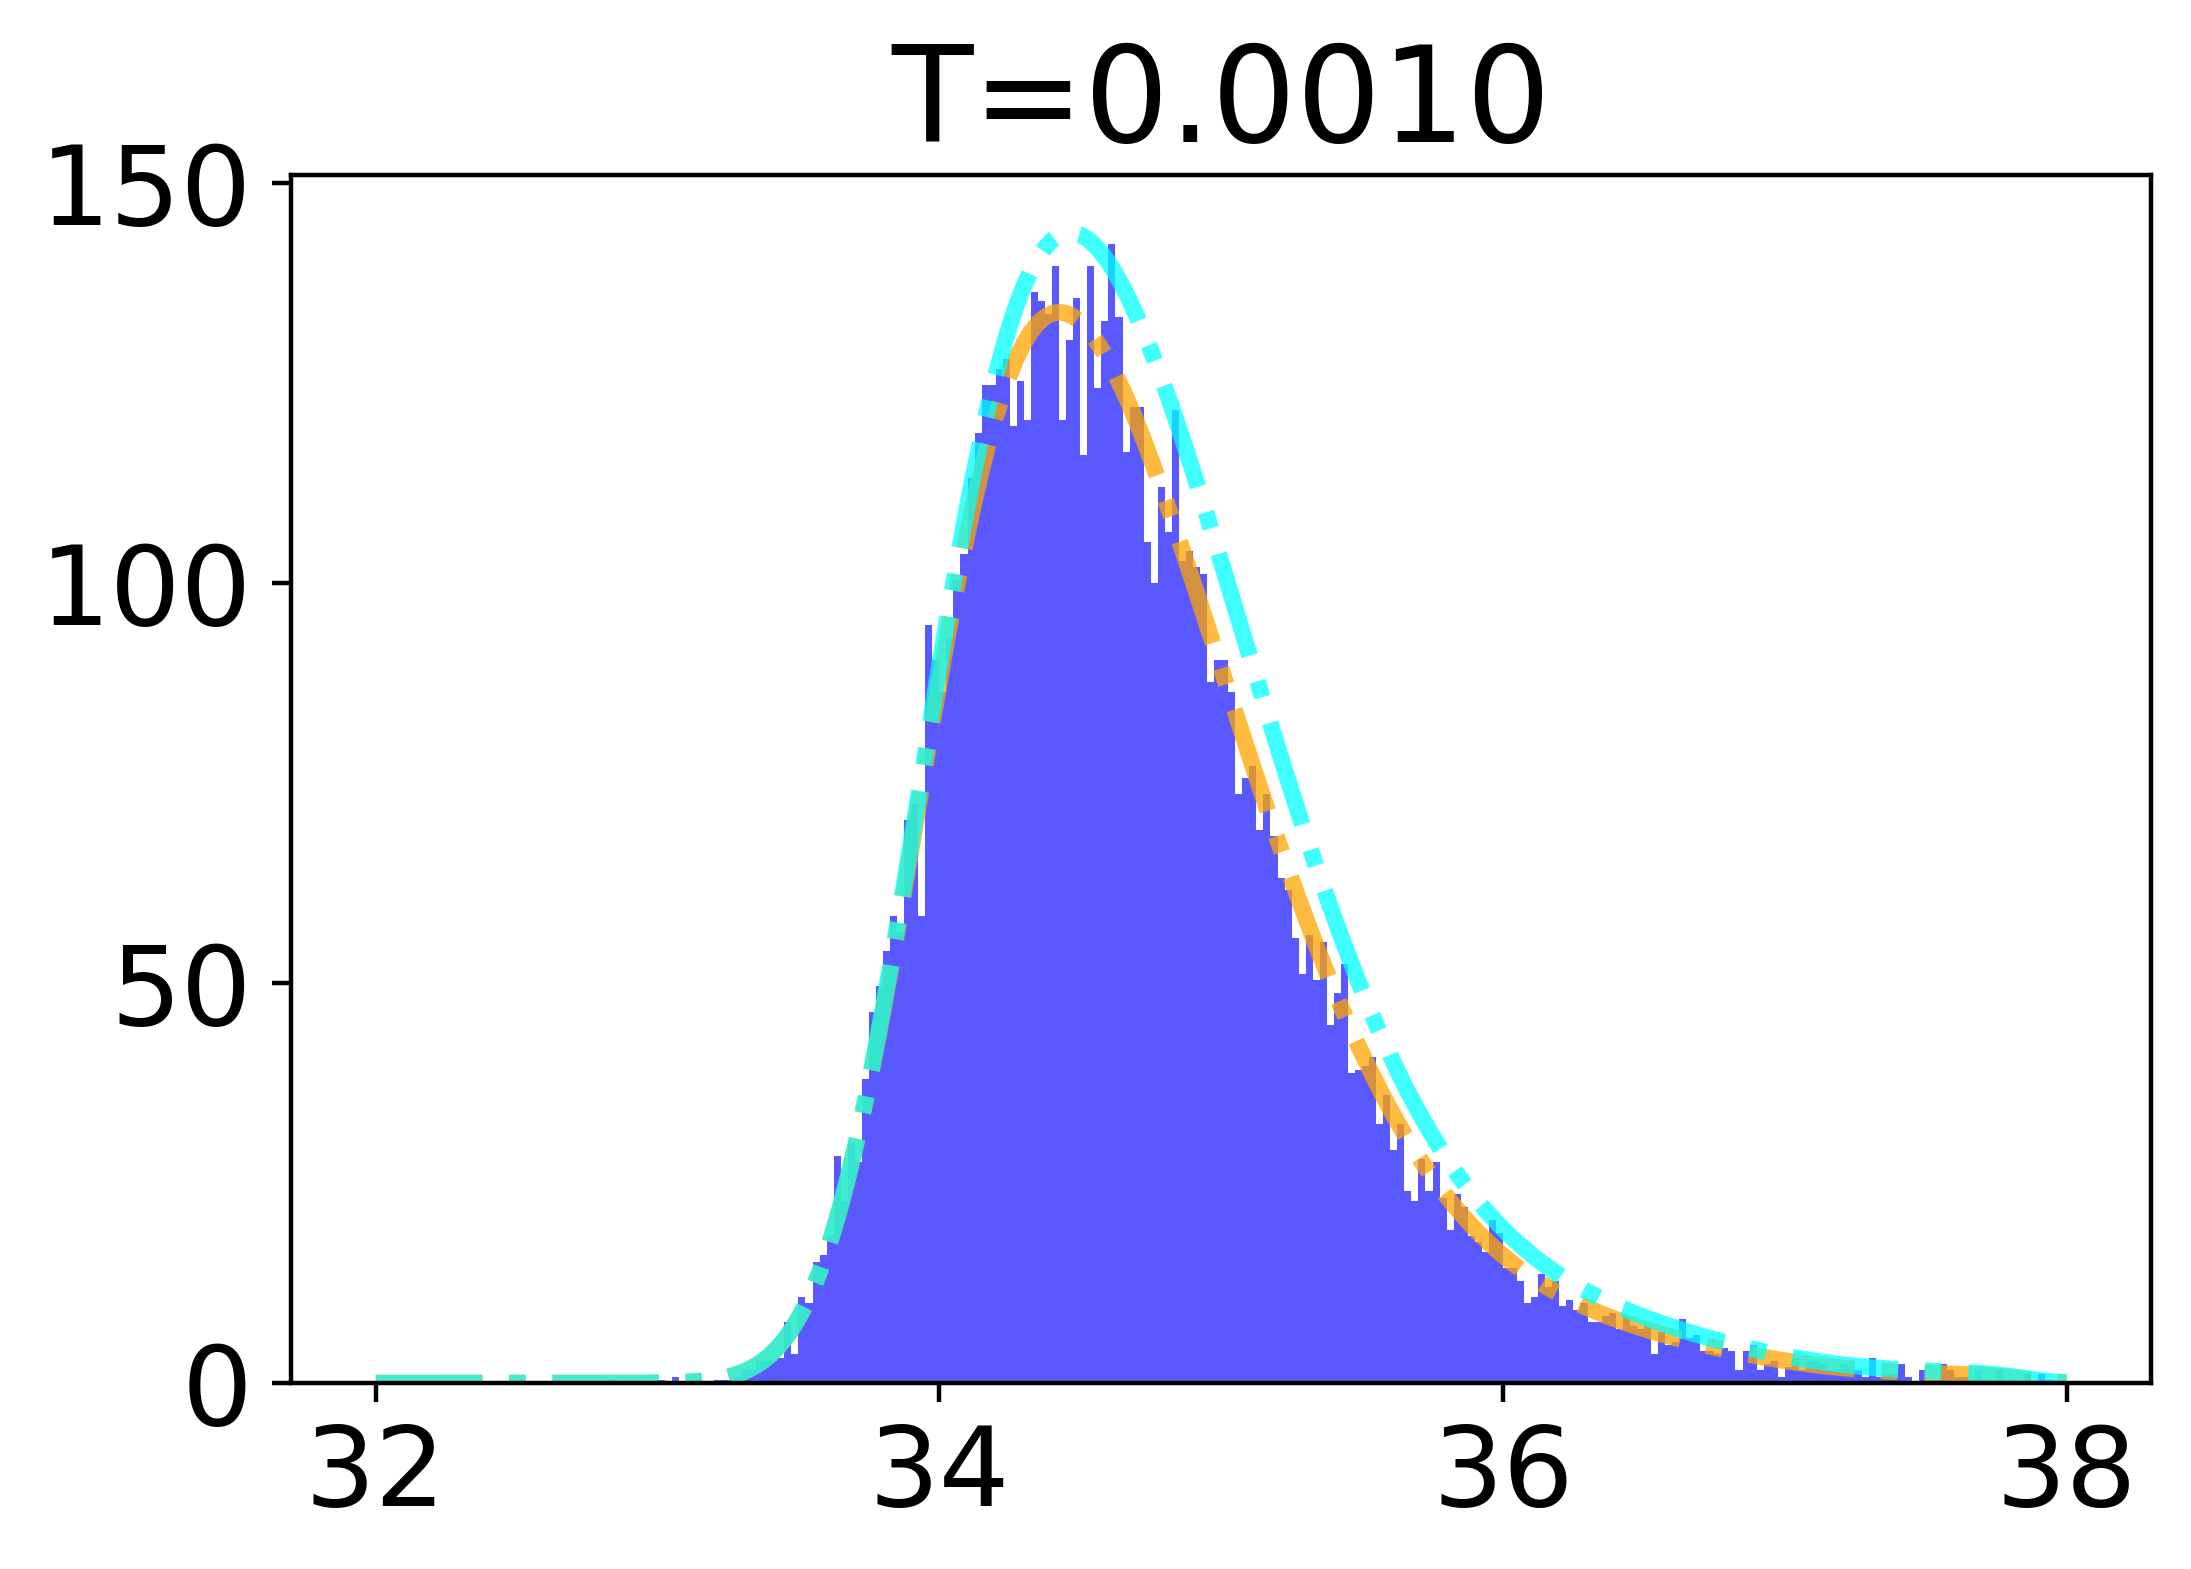

In [178]:
fig = plt.figure(figsize=(6,4), dpi=400)
plt.rcParams.update({'font.size': 20})
ax = fig.add_subplot(111)
ax.plot(t_fine*1e9, pois_fit/1e6, label='Poisson Fit', linestyle='-.', alpha=0.75, linewidth=3, color='orange')
ax.plot(t_fine*1e9, dead_fit/1e6, label='Deadtime Fit', linestyle='-.', alpha=0.75, linewidth=3, color='cyan')

bin_array = set_binwidth(t_min, t_max, dt)
n, bins = np.histogram(flight_time, bins=bin_array)
binwidth = np.diff(bins)[0]
N = n / binwidth / n_shots  # [Hz]
center = 0.5 * (bins[:-1] + bins[1:])
ax.bar(center*1e9, N/1e6, align='center', color='blue', width=binwidth*1e9, alpha=0.65, label='Detections')

# ax.set_ylabel('Arrival Rate [MHz]')
# ax.set_xlabel('Time of Flight [ns]')
ax.set_title('T={:.4f}'.format(10**-float(OD_name_lst[idx][-3:])))
# ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
# plt.legend(prop={'size': 15})
plt.show()